#### Importer les bibliothéques 

In [64]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder


from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense , Conv2D , Flatten , MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import  mnist
from tensorflow.keras.models import load_model

#### Importer le dataset

In [65]:
( x_train , y_train ) , ( x_test , y_test) =  mnist.load_data()

#### Analyser le dataset

In [66]:
x_train.shape

(60000, 28, 28)

In [67]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [68]:
### Normaliser le dataset
x_train = x_train / 255 
x_test =  x_test / 255

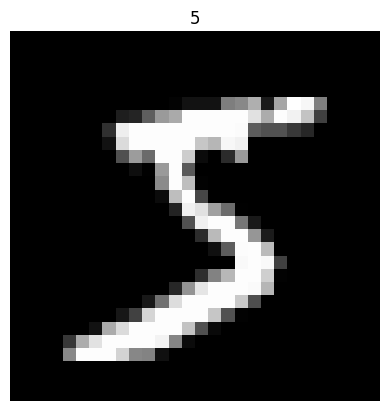

In [69]:
plt.imshow(x_train[0], cmap='gray')
plt.title(y_train[0])
plt.axis('off')
plt.show()

In [70]:
##nombre de class 
n_class = len(np.unique(y_train))

print("nombre de class  : " , n_class)

nombre de class  :  10


In [71]:
### utilisation de one_hot_encoder  

y_train_cat = to_categorical(y_train , n_class) 
y_test_cat = to_categorical(y_test , n_class)

#### Utilisation du CNN 

In [72]:
### creation du model 

model = Sequential([
    Conv2D(6, kernel_size =(3,3) , activation = 'relu' , input_shape = (28, 28 , 1)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(20 , kernel_size =(3,3) , activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(30 , kernel_size =(3,3) , activation = 'relu'),
    Flatten(),
    Dense(50 , activation = "relu"),
    Dense(n_class , activation= "softmax")
    
])

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 13, 13, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 20)        1100      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 5, 5, 20)          0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 3, 3, 30)          5430      
                                                                 
 flatten_5 (Flatten)         (None, 270)              

In [74]:
### compilation du model

model.compile(optimizer=Adam(learning_rate=0.001 ) , loss = 'categorical_crossentropy' , metrics=["accuracy"])

In [75]:
### Entrainement du model 
history = model.fit(x_train , y_train_cat , epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2280 - accuracy: 0.9293
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0737 - accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0551 - accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0432 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0368 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0310 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0270 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0231 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0200 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - 

In [76]:
### Evaluation du model 

loss_tess , accuracy_test = model.evaluate(x_test , y_test_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.0373 - accuracy: 0.9883


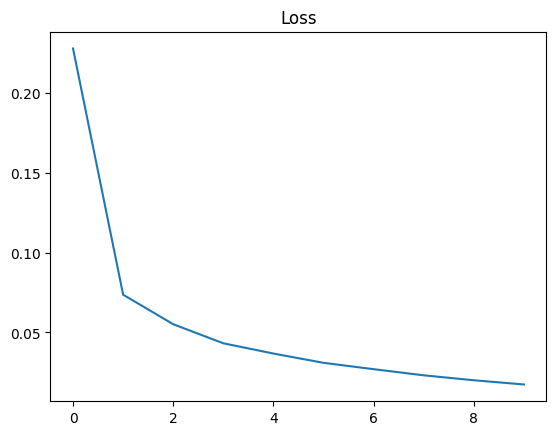

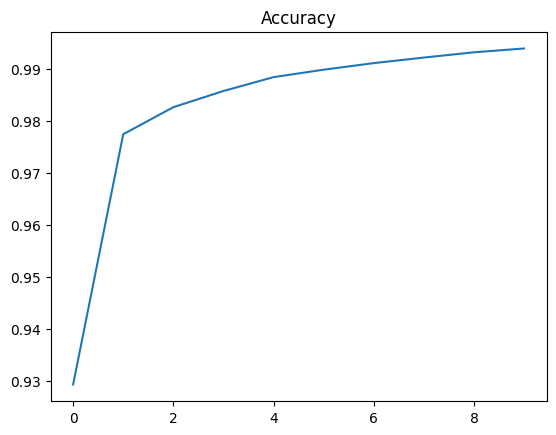

In [77]:
### Tracer la courbe de loss et accuracy du train 

### Graphe loss et accuracy 
loss_train = history.history["loss"]
accuracy_train = history.history["accuracy"]

plt.plot(loss_train)
plt.title("Loss")
plt.show()
plt.plot(accuracy_train)
plt.title("Accuracy")
plt.show()

In [80]:
### Sauvarger le model 
model.save("mm_mist")

INFO:tensorflow:Assets written to: mm_mist\assets


INFO:tensorflow:Assets written to: mm_mist\assets


In [81]:
## chargerl le model 

new_model = load_model("mm_mist")

In [ ]:
## prediction du model 
y_pred = new_model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [89]:
prediction_label =np.argmax( y_pred[0])
prediction_label

7

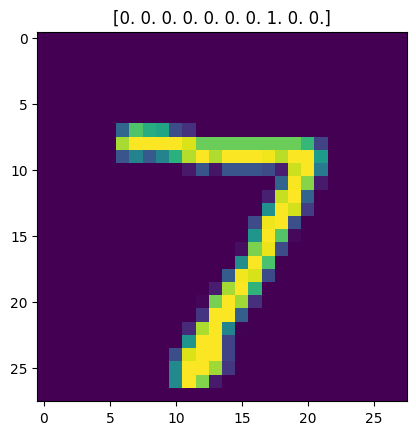

In [90]:
## verfier 

plt.imshow(x_test[0])
plt.title(y_test_cat[0])
plt.show()